# Exploritary Data Analysis

1. Basics
2. Missing Values
3. Outliers
4. Distribution
5. Correlation


In [1]:
import pandas as pd
import plotly.express as px
train = pd.read_csv('train_house_prices.csv')
test = pd.read_csv('test_house_prices.csv')
categorical_features = train.select_dtypes(include=["object"])
numeric_features = train[train.columns[train.dtypes != "object"]]

## 1. Basics

* Number of rows
* Number of columns

In [2]:
# shape(rows, columns)
print(f'Shape of train data = {train.shape}')
print(f'Shape of test data = {test.shape}')

Shape of train data = (1460, 81)
Shape of test data = (1459, 80)


## 2. Distribution

Distributions are being used to check the distribution of the data. 
Different Distributions:
* Discrete distribution: binomial or Poisson
* Coninuous distribution: Normal or unifrom
* Multivariate distribution: Multivariate normal or Multinomial
* Univariate distribution: Normal or exponential
* Exponential family distributions
* heavy-tailed distributions: Student's t-distribution, Cauchy or Pareto
* Skewed distribution: Lognormal or exponential


This is important to check if the data is distributed for the right machine learning algorithms:
* Normal Distribution: Linear regression, logistic regression, linear discriminant analysis (LDA), Gaussian naive Bayes
* Any distribution: Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Neural Network


### 2.1 Normal Distribution of Target Variable

* Normal Distribution and Probability plot of SalePrice

Kurtosis of SalePrice = 6.536281860064529
Skewness of SalePrice = 1.880940746034036


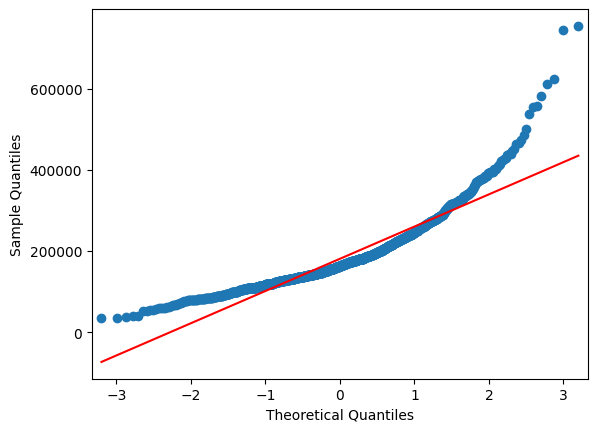

In [3]:
from scipy.stats import skew
import numpy as np
skewness = skew(train['SalePrice'])
kurtosis = train['SalePrice'].kurt()
print(f'Kurtosis of SalePrice = {kurtosis}')
print(f'Skewness of SalePrice = {skewness}')
train['SalePrice'].describe()
fig_1 = px.histogram(train, x="SalePrice",histnorm="probability density")
fig_1.show()
# using statsmodels
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(train['SalePrice'], line='s').gca().lines

So we have to transform the target variable to make it more normally distributed in Data Preprocessing.

## 3. Correlation

Why check correlation?
* Check if there are features that are highly correlated with the target variable. This improves the performance of a multiple linear regression model, because:
    * The features are then important predictors of the target variable. As a result, the multiple linear regression model will be able to more accurately capture the relationships between the features and the target variable, leading to better predictions of the target variable.
* Check if there is multicollinearity. This means features are highly correlated with each other. This will cause problems:
    * The MLR model will give widly different coefficients
    * Lower the ability to detect significant features
    * Example:
        * x1 and x2 are highly correlated 
        * y = w1*x1 + w2*x2 + b
        * y = 50000*x1 + 100*x2 + b = 100*x1 + 50000*x2 + b
        * The coefficients are very different, but the model is the same. So you will not be able to detect the important features.


* Create correlation map to see which numeric features are correlated with SalePrice

In [4]:
# Pearson's correlatoin
corr = numeric_features.corr(method='pearson')
fig_corr = px.imshow(corr, x=numeric_features.columns, y=numeric_features.columns, color_continuous_scale=px.colors.sequential.Reds)
fig_corr.show()

In [5]:


# Compute the Pearson's correlation coefficient
corr = numeric_features.corr(method="pearson")

# Select the correlations with the target column
target_corr = corr["SalePrice"]

# Create a new DataFrame with the correlations
corr_df = pd.DataFrame(target_corr, numeric_features.columns).sort_values(by="SalePrice", ascending=False)  

corr_df.head(40)

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

## 4. Missing Values, Unusual Features and Data Types

### 4.1 Check Missing Values

* Make a table of the data types, amount of null values (Checking Missing Values) and description of all the features

In [6]:
def Visualize_NA(df, s):
    d_t = df.dtypes
    n_v = df.isnull().sum()
    f_n = df.columns
    p_n_v = (n_v/df.shape[0])*100
    df_dt_nul_per = pd.DataFrame({'Features':f_n,'Data Types': d_t, 'Null Values': n_v, 'Percentage Null Values': p_n_v})
    df_dt_nul_per = df_dt_nul_per.sort_values(by='Null Values', ascending=False)
    if s == 1:
        return df_dt_nul_per
    else:
        df_dt_nul_per.drop('Features', inplace=True, axis=1)
        df_dt_nul_per = df_dt_nul_per[df_dt_nul_per['Null Values'] > 0]
        return df_dt_nul_per

Visualize_NA(train,0).head(40)

Data Types  Null Values  Percentage Null Values
PoolQC           object         1453               99.520548
MiscFeature      object         1406               96.301370
Alley            object         1369               93.767123
Fence            object         1179               80.753425
FireplaceQu      object          690               47.260274
LotFrontage     float64          259               17.739726
GarageYrBlt     float64           81                5.547945
GarageCond       object           81                5.547945
GarageType       object           81                5.547945
GarageFinish     object           81                5.547945
GarageQual       object           81                5.547945
BsmtFinType2     object           38                2.602740
BsmtExposure     object           38                2.602740
BsmtQual         object           37                2.534247
BsmtCond         object           37                2.534247
BsmtFinType1     object           37                2.534247
MasVnrArea      float64            8                0.547945
MasVnrType       object            8                0.547945
Electrical       object            1                0.068493

* Visualize Missing Values

In [7]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(Visualize_NA(train,1), x= 'Features', y= 'Null Values', color= 'Null Values', color_continuous_scale=px.colors.sequential.Plasma_r,height=400,)
fig.show()

* Heatmap of Missing Values

In [8]:
null_counts = train.isnull()
fig_heatmap = px.imshow(null_counts, x=train.columns, y=train.index, color_continuous_scale=px.colors.sequential.Reds)
fig_heatmap.show()

### 4.2 Delete Unusual Features

* Check for unusual features

In [9]:
nunique = train.nunique()
nunique = nunique[nunique.values < 3]
for i in range(len(nunique)):
    print(train[f'{nunique.index[i]}'].describe())


count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object


* Delete Unusual Features by hand

In [10]:
train = train.drop(labels=['Utilities', 'Street'], axis=1) 
print(f'Shape of train data = {train.shape}')

Shape of train data = (1460, 79)


### 4.3 Fix Data Types

* Check if there are any features with wrong data types:
    * Numerical features that actually are categorical
    * Categorical features that actually are numerical
* Check which numerical features has a small number of unique values and read there description to see if they are actually categorical.
* Year features are numerical but they are actually categorical, expect if they are linearly correlated with SalePrice
* Postcode is numerical but it is actually categorical, because a higher postcode is not a higher value.

In [11]:
numeric_features_fix = train[train.columns[train.dtypes != "object"]]
n_data_types = numeric_features_fix.dtypes
features_names_fix = numeric_features_fix.columns
unique_values_fix = numeric_features_fix.nunique()
data_type_fix = pd.DataFrame({'Feature': features_names_fix,'Data Types': n_data_types, 'Unique Values': unique_values_fix}).sort_values(by='Unique Values', ascending=True)
data_type_fix.head(40)

Feature Data Types  Unique Values
BsmtHalfBath    BsmtHalfBath      int64              3
HalfBath            HalfBath      int64              3
FullBath            FullBath      int64              4
BsmtFullBath    BsmtFullBath      int64              4
Fireplaces        Fireplaces      int64              4
KitchenAbvGr    KitchenAbvGr      int64              4
GarageCars        GarageCars      int64              5
YrSold                YrSold      int64              5
BedroomAbvGr    BedroomAbvGr      int64              8
PoolArea            PoolArea      int64              8
OverallCond      OverallCond      int64              9
OverallQual      OverallQual      int64             10
TotRmsAbvGrd    TotRmsAbvGrd      int64             12
MoSold                MoSold      int64             12
MSSubClass        MSSubClass      int64             15
3SsnPorch          3SsnPorch      int64             20
MiscVal              MiscVal      int64             21
LowQualFinSF    LowQualFinSF      int64             24
YearRemodAdd    YearRemodAdd      int64             61
ScreenPorch      ScreenPorch      int64             76
GarageYrBlt      GarageYrBlt    float64             97
LotFrontage      LotFrontage    float64            110
YearBuilt          YearBuilt      int64            112
EnclosedPorch  EnclosedPorch      int64            120
BsmtFinSF2        BsmtFinSF2      int64            144
OpenPorchSF      OpenPorchSF      int64            202
WoodDeckSF        WoodDeckSF      int64            274
MasVnrArea        MasVnrArea    float64            327
2ndFlrSF            2ndFlrSF      int64            417
GarageArea        GarageArea      int64            441
BsmtFinSF1        BsmtFinSF1      int64            637
SalePrice          SalePrice      int64            663
TotalBsmtSF      TotalBsmtSF      int64            721
1stFlrSF            1stFlrSF      int64            753
BsmtUnfSF          BsmtUnfSF      int64            780
GrLivArea          GrLivArea      int64            861
LotArea              LotArea      int64           1073
Id                        Id      int64           1460

In [12]:
train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

* YrSold is a year numerical
* MoSold is a month numerical
* MSSubClass is a categorical, because 190 is not better than 20

* YearBuilt, YearRemodAdd and GarageYrBlt are linear collinear with SalePrice. So they stay numerical.

In [13]:
for col in ['YrSold', 'MoSold', 'MSSubClass']:
    train[col] = train[col].astype(str)

### 4.3 Imputing Missing Values

In [14]:
def handleNA(df):
    df['MiscFeature'].fillna(value='None',inplace=True)
    df['Alley'].fillna(value='No alley access',inplace=True)    
    df['BsmtQual'].fillna(value='No Basement',inplace=True)
    df['BsmtCond'].fillna(value='No Basement',inplace=True)
    df['BsmtExposure'].fillna(value='No Basement',inplace=True)
    df['BsmtFinType1'].fillna(value='No Basement',inplace=True)    
    df['BsmtFinType2'].fillna(value='No Basement',inplace=True)    
    df['FireplaceQu'].fillna(value='No Fireplace',inplace=True)    
    df['GarageType'].fillna(value='No Garage',inplace=True)  
    df['GarageYrBlt'].fillna(value=0,inplace=True)
    df['GarageFinish'].fillna(value='No Garage',inplace=True)
    df['GarageQual'].fillna(value='No Garage',inplace=True)
    df['GarageCond'].fillna(value='No Garage',inplace=True)
    df['MasVnrType'].fillna(value='None',inplace=True)
    df['MasVnrArea'].fillna(value=0.0,inplace=True)
    df['PoolQC'].fillna(value='No Pool',inplace=True)    
    df['Fence'].fillna(value='No Fence',inplace=True)
def meanNA(df, s):
    df[s].fillna(value=df[s].mean(),inplace=True)
    
def most_frequentNA(df, s):
    df[s].fillna(value=df[s].value_counts().idxmax(),inplace=True)

* Replace with 0

In [15]:
handleNA(train)

* **LotFrontage**: Linear feet of street connected to property. Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.

In [16]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

* **Electrical**: Replace with the most frequent value

In [17]:
most_frequentNA(train, 'Electrical')

In [18]:
print(f'Shape of data: {train.shape}')
print(f'Count of null values: {train.isnull().sum().sum()}')

Shape of data: (1460, 79)
Count of null values: 0


In [19]:
# Create heatmap with plotly of all the null values in train data   
fig_heatmap = px.imshow(train.isnull(), x=train.columns, y=train.index, color_continuous_scale=px.colors.sequential.Reds)
fig_heatmap.show()

## 5. Outliers

* We will use minimum and maximum threshold to remove the outliers from all the numeric features in training data.
* We will delete every record less than min threshold and more than max threshold.
* Please note that whenever possible its better idea to use outliers for analysis and prediction, to make makes the model more robust. Because in the real world we will always encounter the outliers!


In [20]:
import time
import pandas as pd
from plotly.subplots import make_subplots

def remove_outliers(df,columns,n_std):
    fig_outliers_subs = make_subplots(rows=len(columns), cols=1, subplot_titles=columns)
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        z_scores = [(x - mean) / sd for x in df[col]]
        # Create a list of colors for the markers in the scatter plot
        colors = ['green' if z_score < n_std else 'orange' for z_score in z_scores]

        # Create the scatter plot
        fig_outliers_subs.add_trace(go.Scatter(x=df[col], y=df['SalePrice'], mode='markers', marker=dict(color=colors)), row=columns.index(col)+1, col=1)
        #fig_outliers = px.scatter(df, x=col, y='SalePrice', color=colors, title='Outliers in {}'.format(col))   

        # Create a figure and add the scatter plot to the figure
        # fig_outliers = go.Figure(data=scatter)

        # Display the figure
        #fig_outliers.show()
        
        df = df[(df[col] <= mean+(n_std*sd))]
    fig_outliers_subs.update_layout(template='plotly_white', title='Outliers in the data', height=10000, width=1000)
    fig_outliers_subs.show()
    return df
print(f'Shape of train data = {train.shape}')
train = remove_outliers(train, ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', 'ScreenPorch', 'MiscVal'], 7.25)
list_not_deleted = ['LowQualFinSF', '3SsnPorch', 'PoolArea']
print(f'Shape of train data = {train.shape}')



Shape of train data = (1460, 79)
Working on column: LotFrontage
Working on column: LotArea
Working on column: OverallQual
Working on column: OverallCond
Working on column: MasVnrArea
Working on column: BsmtFinSF1
Working on column: BsmtFinSF2
Working on column: BsmtUnfSF
Working on column: TotalBsmtSF
Working on column: 1stFlrSF
Working on column: 2ndFlrSF
Working on column: GrLivArea
Working on column: BsmtFullBath
Working on column: BsmtHalfBath
Working on column: FullBath
Working on column: HalfBath
Working on column: BedroomAbvGr
Working on column: KitchenAbvGr
Working on column: TotRmsAbvGrd
Working on column: Fireplaces
Working on column: GarageCars
Working on column: GarageArea
Working on column: WoodDeckSF
Working on column: OpenPorchSF
Working on column: EnclosedPorch
Working on column: ScreenPorch
Working on column: MiscVal


Shape of train data = (1442, 79)


## 6. Remove multicollinearity

* Check VIF at numerical features
* Check VIF at dummy-encoded categorical features

In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = train.select_dtypes(include=['int64', 'float64'])
# Get the VIF for each feature
vif = pd.DataFrame()
vif["feature"] = num_cols.columns
vif["VIF"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

# Display the results
print(vif[vif['VIF'] > 100])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in scalar divide



         feature           VIF
5      YearBuilt  1.333266e+04
6   YearRemodAdd  1.381357e+04
8     BsmtFinSF1           inf
9     BsmtFinSF2           inf
10     BsmtUnfSF           inf
11   TotalBsmtSF           inf
12      1stFlrSF           inf
13      2ndFlrSF           inf
14  LowQualFinSF           inf
15     GrLivArea           inf


The features that are infinitley correlated with each other are also highly correlated with the target variable. With those I will make new combining features later on. So we will not delete them. We will only delete LowQualFinSF

In [22]:
train = train.drop(['LowQualFinSF'], axis=1)

## 7. Normalize numerical data

Why use normal distribution?
* The data is symmetric, has one peak and has a defined range
* It has simple and efficient algorithms for generating synthetic data that follows the distribution. Called the ox-Muller transform
* !! It helps gradient descent converge faster, because now the features are on the same scale. !!*
* It easier to compare the effect of different features on the target variable, because the features are on the same scale.
* These algoritmes assume that the data is normally distributed:
    1. Linear Regression
    2. Logistic Regression
    3. Linear discriminant analysis
    5. Gaussian naive Bayes
    6. Bayesian linear regression
    7. Bayesian logistic regression
    8. Bayesian linear discriminant analysis (BLDA)
    9. Expectation-maximization (EM) algorithm
    10. Restricted Boltzmann machine (RBM)
    11. Deep belief network (DBN)
    12. Autoencoder
    13. Variational autoencoder (VAE)
    14. Generative adversarial network (GAN)
    15. Evolutionary algorithms (e.g., genetic algorithms)
    16. Particle swarm optimization (PSO)
    17. Stochastic gradient descent (SGD)
    18. Kalman filter
    19. Hidden Markov model (HMM)
    20. Conditional random field (CRF)
    

We will use Skewness, Kurtosis and Shapiro-Wilk test for normality.

* Skewness assesses the extent to which a variable’s distribution is symmetrical. The thumb rule is,

    *  If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
    *  If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
    * If the skewness is less than -1 or greater than 1, the data are highly skewed.
* Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve. The thumb rule is,

    * Kurtosis greater than +1 indicates distribution is too peaked.
    * Kurtosis less than –1 indicates a distribution that is too flat.

### 7.1 Skewness of all numerical features

In [23]:
num_cols_2 = train.select_dtypes(include=['int64', 'float64'])
skew_numeric_features = train[num_cols_2.columns].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness_numeric_features = pd.DataFrame({'Skew' :skew_numeric_features})
skewness_numeric_features.head(30)

Skew
PoolArea       19.303943
MiscVal        11.387611
3SsnPorch      10.239037
KitchenAbvGr    4.429278
BsmtFinSF2      4.165179
LotArea         3.996168
BsmtHalfBath    3.946741
ScreenPorch     3.912103
EnclosedPorch   2.873724
MasVnrArea      2.485875
OpenPorchSF     2.222709
SalePrice       1.906590
WoodDeckSF      1.514753
GrLivArea       1.113570
1stFlrSF        0.967243
BsmtUnfSF       0.922930
2ndFlrSF        0.819442
BsmtFinSF1      0.802643
OverallCond     0.682256
HalfBath        0.655007
Fireplaces      0.635661
TotRmsAbvGrd    0.632953
LotFrontage     0.584470
TotalBsmtSF     0.580496
BsmtFullBath    0.570912
OverallQual     0.205616
BedroomAbvGr    0.205112
GarageArea      0.146025
FullBath        0.058670
Id             -0.005536

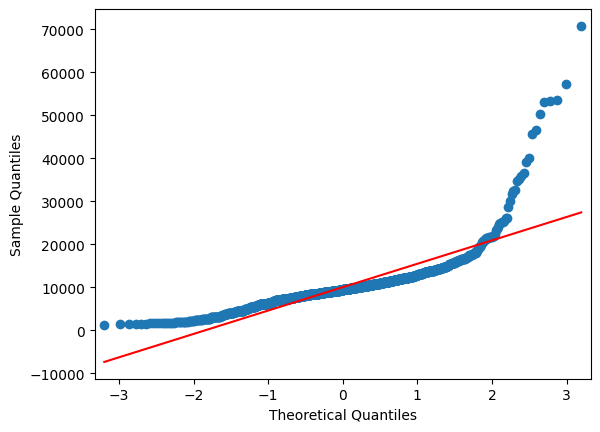

In [24]:
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(train['LotArea'], line='s').gca().lines

Use boxcox transformation to normalize the data. The boxcox transformation is a power transformation that is applied to make data more normal distribution-like. It is defined as:

In [25]:
from scipy.special import boxcox1p
import scipy.stats as stats
skewness_index = skewness_numeric_features[skew_numeric_features > 0.5].index
for i in skewness_index:
    #train[i] = boxcox1p(train[i], stats.boxcox_normmax(train[i] + 1))
    train[i] = np.log1p(train[i])

* Check skewness of all numerical features after log1p transformation

In [26]:
num_cols_2 = train.select_dtypes(include=['int64', 'float64'])
skew_numeric_features = train[num_cols_2.columns].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness_numeric_features = pd.DataFrame({'Skew' :skew_numeric_features})
skewness_numeric_features.head(30)

Skew
PoolArea       18.936026
3SsnPorch       7.684860
MiscVal         5.426458
KitchenAbvGr    4.429278
BsmtHalfBath    3.946741
ScreenPorch     3.192619
BsmtFinSF2      2.566922
EnclosedPorch   2.114714
HalfBath        0.560021
MasVnrArea      0.504784
BsmtFullBath    0.411481
2ndFlrSF        0.301179
OverallQual     0.205616
BedroomAbvGr    0.205112
Fireplaces      0.182540
WoodDeckSF      0.148480
GarageArea      0.146025
SalePrice       0.122863
FullBath        0.058670
1stFlrSF        0.031424
Id             -0.005536
OpenPorchSF    -0.022794
GrLivArea      -0.059785
TotRmsAbvGrd   -0.087590
OverallCond    -0.271154
GarageCars     -0.331225
YearRemodAdd   -0.502287
YearBuilt      -0.611580
BsmtFinSF1     -0.614506
LotArea        -0.716729

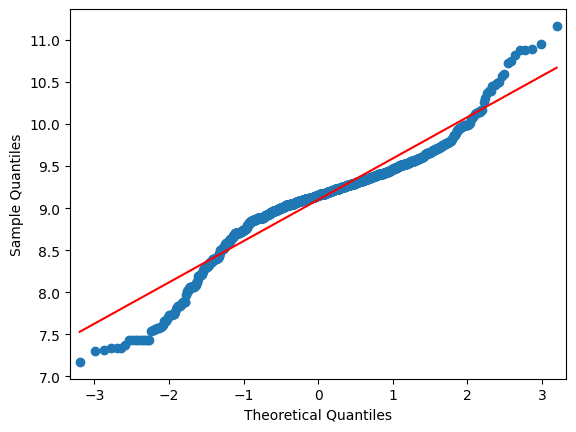

In [27]:
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(train['LotArea'], line='s').gca().lines

### 7.2 Normal Distribution of Target Variable

* Normal Distribution and Probability plot of SalePrice

Kurtosis of SalePrice = 0.8415620295788773
Skewness of SalePrice = 0.12273478324588445


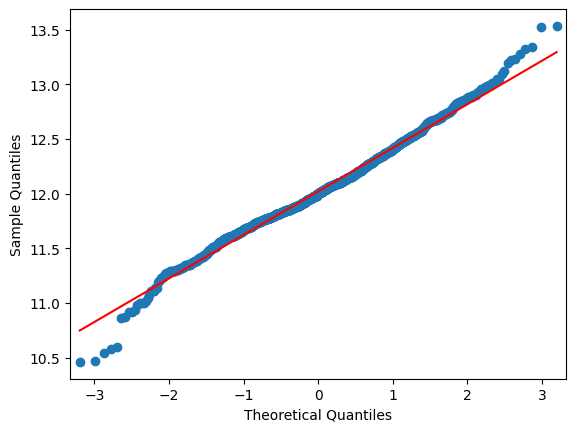

In [28]:
from scipy.stats import skew
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
skewness = skew(train['SalePrice'])
kurtosis = train['SalePrice'].kurt()
print(f'Kurtosis of SalePrice = {kurtosis}')
print(f'Skewness of SalePrice = {skewness}')
train['SalePrice'].describe()
fig_1 = px.histogram(train, x="SalePrice",histnorm="probability density")
fig_1.show()
# using statsmodels
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(train['SalePrice'], line='s').gca().lines

* Transform SalePrice

In [29]:
"""
 Instaed of log() we are using log1p() 
 log1p() calculates log(1 + x), so it takes of issue of log(0) error 
 For reverse transformation just use expm1()    
"""
yLog = np.log1p(train['SalePrice'])

* Check again for normal distribution and probability plot

Kurtosis of SalePrice = 0.8415620295788773
Skewness of SalePrice = 0.12273478324588445


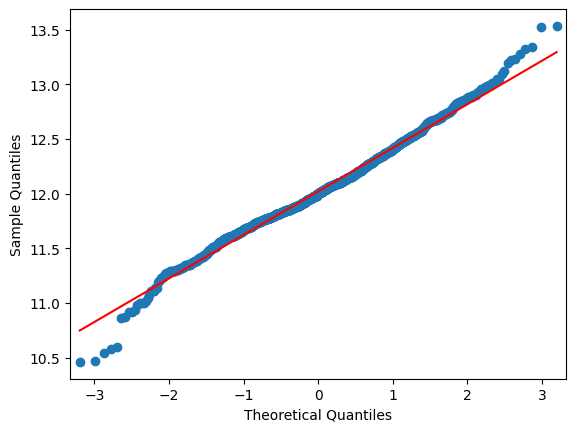

In [30]:
skewness = skew(train['SalePrice'])
kurtosis = train['SalePrice'].kurt()
print(f'Kurtosis of SalePrice = {kurtosis}')
print(f'Skewness of SalePrice = {skewness}')
train['SalePrice'].describe()
fig_1 = px.histogram(train, x="SalePrice",histnorm="probability density")
fig_1.show()
qqplot_data = qqplot(train['SalePrice'], line='s').gca().lines

## 8. Adding New Features

* Since area related features are very important to determine the house price, we will create a new feature by the name 'TotalSF' by adding 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'.
* Similarly we will create one more new feature by name 'TotalSF1' by adding 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'. Here 'BsmtFinSF1' and 'BsmtFinSF2' represent finished square feet of all area, that's why we are creating a separate feature using it.
* Create new feature 'YrBltAndRemod' by adding 'YearBuilt' and 'YearRemodAdd'
* Create new feature 'TotalBathrooms' by adding all the bathrooms in the house.
* Create new feature 'TotalPorchSF' by adding all porch area.

In [31]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['TotalSF1'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF']

train['YrBltAndRemod']= train['YearBuilt'] + train['YearRemodAdd']

train['TotalBathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

train['TotalPorchSF'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                              train['EnclosedPorch'] + train['ScreenPorch'] +
                              train['WoodDeckSF'])

print(f'Shape all_data: {train.shape}')

Shape all_data: (1442, 83)


In [32]:
print(f'Shape all_data: {train.shape}')
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print(f'Shape all_data: {train.shape}')

Shape all_data: (1442, 83)
Shape all_data: (1442, 88)


In [33]:
train = train.drop(['SalePrice', 'Id', 'PoolQC'], axis=1)

In [34]:
#Lets check the count of numerical and categorical features
cat_feats = train.dtypes[train.dtypes == "object"].index
numeric_feats = train.dtypes[train.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

print(f"\nList of cetagorical features: { cat_feats.to_list() }\n\nList of numerical features: { numeric_feats.to_list() }")

Number of categorical features: 43, Numerical features: 42

List of cetagorical features: ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

List of numerical features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fi

In [35]:
test333 = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
tes535 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'TotalSF1', 'YrBltAndRemod', 'TotalBathrooms', 'TotalPorchSF', 'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']

n = len(numeric_feats)
m = len(cat_feats)

for i in range(n):
    if numeric_feats[i] not in tes535:
        print(numeric_feats[i])

for i in range(m):
    if cat_feats[i] not in test333:
        print(cat_feats[i])

# 9. Encoding Categorical Features

* We will use Manual Label Encoding for ordinal categorical variables and One Hot Encoding for nominal categorical variables.
* Reason for doing manual label encoding for known order is, if we use sklearn's label encoder, it will randomly encode these ordinal variables and therefore ordinality would be lost.
* Remember that for missing values we have added 'None' category, which we will encode with '0'.

In [36]:
cat_feats_ordinal = ['Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'Fence']

In [37]:
# List of categorical ordinal feature
print(f'List of categorical ordinal features: {cat_feats_ordinal}')

train['Alley'].replace(to_replace = ['None', 'Grvl', 'Pave'], value = [0, 1, 2], inplace = True)
train['LotShape'].replace(to_replace = ['Reg', 'IR1', 'IR2', 'IR3'], value = [3, 2, 1,0], inplace = True)
train['LandContour'].replace(to_replace = ['Lvl', 'Bnk', 'Low', 'HLS'], value = [3, 2, 1,0], inplace = True)
train['LotConfig'].replace(to_replace = ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], value = [0, 3, 1, 2, 4], inplace = True)
train['LandSlope'].replace(to_replace = ['Gtl', 'Mod', 'Sev'], value = [2, 1, 0], inplace = True)
train['BldgType'].replace(to_replace = ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], value = [4, 3, 2, 1, 0], inplace = True)
train['RoofStyle'].replace(to_replace = ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], value = [4, 2, 3, 1, 5, 0], inplace = True)
train['RoofMatl'].replace(to_replace = ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], value = [7, 6, 5, 4, 3, 2, 1, 0], inplace = True)
train['ExterQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
train['ExterCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
train['BsmtQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
train['BsmtCond'].replace(to_replace = ['Gd', 'TA', 'Fa', 'Po', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
train['BsmtExposure'].replace(to_replace = ['Gd', 'Av', 'Mn', 'No', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
train['BsmtFinType1'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['BsmtFinType2'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['HeatingQC'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
train['KitchenQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
train['Functional'].replace(to_replace = ['Typ', 'Min1', 'Min2', 'Mod',  'Maj1', 'Maj2', 'Sev'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['FireplaceQu'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
train['GarageType'].replace(to_replace = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['GarageFinish'].replace(to_replace = ['Fin', 'RFn', 'Unf', 'None'], value = [3, 2, 1, 0], inplace = True)
train['GarageQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
train['GarageCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa',  'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
train['PavedDrive'].replace(to_replace = ['Y', 'P', 'N'], value = [2, 1, 0], inplace = True)
train['Fence'].replace(to_replace = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'None'], value = [4, 3, 2, 1, 0], inplace = True)

print(f'\nShape of all_data: {train.shape}')
train.head()

List of categorical ordinal features: ['Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence']

Shape of all_data: (1442, 85)


MSSubClass MSZoning  LotFrontage   LotArea            Alley  LotShape  \
0         60       RL     4.189655  9.042040  No alley access         3   
1         20       RL     4.394449  9.169623  No alley access         3   
2         60       RL     4.234107  9.328212  No alley access         2   
3         70       RL     4.110874  9.164401  No alley access         2   
4         60       RL     4.442651  9.565284  No alley access         2   

   LandContour  LotConfig  LandSlope Neighborhood  ...    TotalSF   TotalSF1  \
0            3          0          2      CollgCr  ...  20.257977  20.065570   
1            3          3          2      Veenker  ...  14.282490  14.027777   
2            3          0          2      CollgCr  ...  20.415959  19.778763   
3            3          1          2      Crawfor  ...  20.127741  18.878275   
4            3          3          2      NoRidge  ...  21.048414  20.490541   

   YrBltAndRemod TotalBathrooms  TotalPorchSF  haspool  has2ndfloor  \
0           4006       3.039721      4.127134        0            1   
1           3952       2.346574      5.700444        0            0   
2           4003       3.039721      3.761200        0            1   
3           3885       1.693147      9.192991        0            1   
4           4000       3.039721      9.705341        0            1   

   hasgarage  hasbsmt  hasfireplace  
0          1        1             0  
1          1        1             1  
2          1        1             1  
3          1        1             1  
4          1        1             1  

[5 rows x 85 columns]